In [2]:
import pandas as pd

from category_encoders import TargetEncoder

In [2]:
pd.set_option("display.max_columns", None)

In [3]:
path = "../../data/diabetes_processed_dataset.csv"

df = pd.read_csv(path)

In [ ]:
df.shape

(100000, 24)

In [5]:
df.head()

,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,bmi,hbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male,gender_Other,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current,hypertension_0,hypertension_1,heart_disease_0,heart_disease_1
0,32.0,Alabama,0,0,0,0,1,27.32,5.0,100,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,29.0,Alabama,0,1,0,0,0,19.95,5.0,90,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,18.0,Alabama,0,0,0,0,1,23.76,4.8,160,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,41.0,Alabama,0,0,1,0,0,27.32,4.0,159,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,52.0,Alabama,1,0,0,0,0,23.75,6.5,90,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [5]:
from utils.modeling import Modeling
from utils.logistic_regression import LogisticRegressionModel
from utils.evaluation import Evaluation

## Sem GridSearch

In [6]:
model = Modeling()
lr = LogisticRegressionModel()

X_train, X_test, y_train, y_test = model.split_data(df, 'diabetes')
y_pred = lr.predict(X_train, X_test, y_train)

d:\anaconda\envs\diabetes-prediction\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.9574


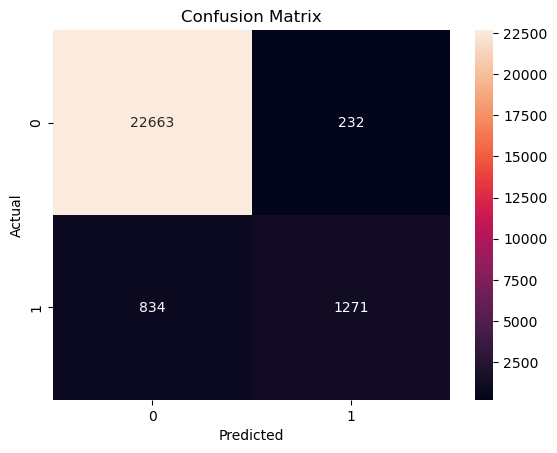

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     22895
           1       0.85      0.60      0.70      2105

    accuracy                           0.96     25000
   macro avg       0.91      0.80      0.84     25000
weighted avg       0.95      0.96      0.95     25000



In [7]:
eval = Evaluation()

eval.evaluate_model(y_test, y_pred)

## Com GridSearch

In [8]:
model = Modeling()
lr = LogisticRegressionModel()
evaluation = Evaluation()

In [9]:
X_train, X_test, y_train, y_test = model.split_data(df=df, target='diabetes')

param_grid = {'C': [0.1, 1, 10], 'solver': ['lbfgs', 'liblinear']}
best_params, best_score = model.grid_search(lr.model, param_grid, 5, X_train, y_train)
print(f"Best Params: {best_params}, Best Score: {best_score}")


d:\anaconda\envs\diabetes-prediction\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\anaconda\envs\diabetes-prediction\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

Best Params: {'C': 1, 'solver': 'liblinear'}, Best Score: 0.9603466666666666


d:\anaconda\envs\diabetes-prediction\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.9574


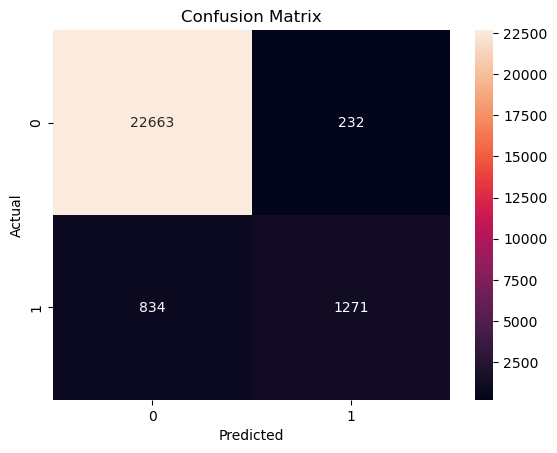

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     22895
           1       0.85      0.60      0.70      2105

    accuracy                           0.96     25000
   macro avg       0.91      0.80      0.84     25000
weighted avg       0.95      0.96      0.95     25000



In [10]:
lr = LogisticRegressionModel(C=best_params['C'], solver=best_params['solver'])

y_pred = lr.predict(X_train, X_test, y_train)

evaluation.evaluate_model(y_test, y_pred)